<a href="https://colab.research.google.com/github/SaiMeghanaGoud/EDA-capstone-project/blob/main/MedicalCostRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('/content/drive/MyDrive/datasets/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.shape

(1338, 7)

In [11]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Preprocessing**

In [13]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['sex']=lab.fit_transform(data['sex'])
data['smoker']=lab.fit_transform(data['smoker'])
data['region']=lab.fit_transform(data['region'])

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Data Exploration**

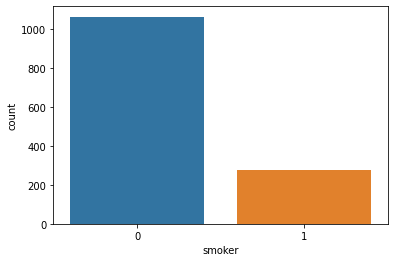

In [15]:
sns.countplot(x='smoker',data=data)

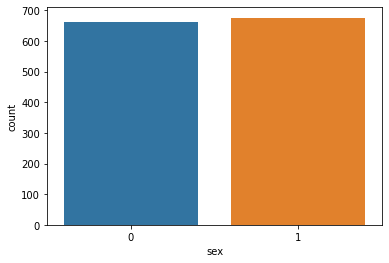

In [16]:
sns.countplot(x='sex',data=data)

**Data Splitting**

In [18]:
x=data.iloc[:,data.columns!='charges']
y=data.iloc[:,data.columns=='charges']

In [19]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,roc_curve,auc

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
xtrain.head()

,age,sex,bmi,children,smoker,region
826,56,1,31.79,2,1,2
571,18,0,37.29,1,0,2
932,46,1,25.80,5,0,3
516,20,1,35.31,1,0,2
835,42,1,35.97,2,0,2


In [23]:
ytrain.head()

,charges
826,43813.86610
571,2219.44510
932,10096.97000
516,27724.28875
835,7160.33030


**RandomForest Regressor**

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=300, random_state=0)

In [27]:
y_pred =regressor.predict(xtest)
#y_pred

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('\n\nr2_score is ',r2_score(y_pred,ytest))



r2_score is  0.7951456139098936


**Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(xtrain,ytrain)
y_predict=alg.predict(xtest)
print('\n\nr2_score is ',r2_score(y_predict,ytest))



r2_score is  0.6272382865955175


**DecisionTreeRegressor**

In [36]:
from sklearn import tree
dt=tree.DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
x_predicted=dt.predict(xtest)
print('\n\nr2_score is',r2_score(x_predicted,ytest))



r2_score is 0.7100414494407479


**SupportVectorMachineRegressor**

In [38]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(xtrain,ytrain)
predicted=regressor.predict(xtest)
print('\n\nr2_score is ',r2_score(predicted,ytest))



r2_score is  -35477.64516563035


**Prediction On New vector**

In [40]:
test_vector =np.reshape(np.asarray([19,0,27.900,0,1,3]),(1,6))
p=int(regressor.predict(test_vector)[0])
p

9097